In [43]:
import numpy as np
import math 
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

def plot(x, width=25, length=3):
    plt.figure(figsize=(width, length))
    plt.plot(x)
    plt.show()

Implementing:

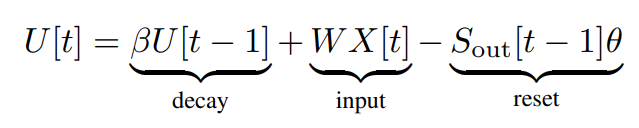

Random 3 inputs $X$ and weights $W$ for 10 timesteps. Beta is usually set manually, but could be learnable as well.

In [2]:
X = np.random.randint(2, size=(3, 100))
W = np.random.random(size=(3, 1))
Beta = 0.9
print("Weights: \n", W)
print("Inputs: \n", X)
print("Beta: \n", Beta)

Weights: 
 [[0.385]
 [0.444]
 [0.989]]
Inputs: 
 [[0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1
  0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1
  1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1]
 [1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1
  1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1
  0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1]
 [1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0
  0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0
  0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0]]
Beta: 
 0.9


Examplary current $I = WX[t]$:

In [3]:
W * X[:, 1, None]

array([[0.385],
       [0.444],
       [0.   ]])

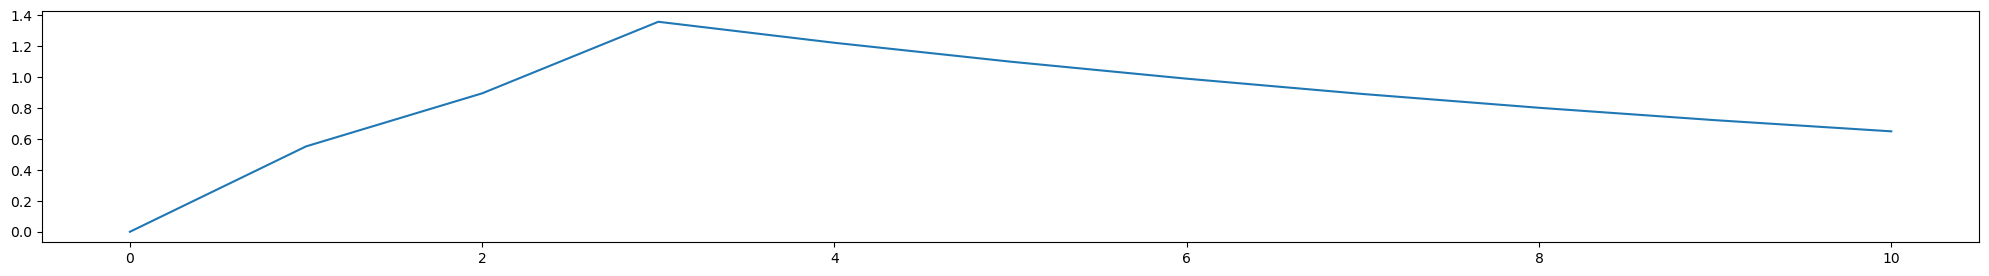

In [44]:
membrane_potential = [0]
for t in range(10):
    I = (W * X[:, t, None]).sum()
    U = Beta * membrane_potential[-1] + I
    membrane_potential.append(U)

plot(membrane_potential)

Not bad but we would like to get something that looks like this qualitatively:

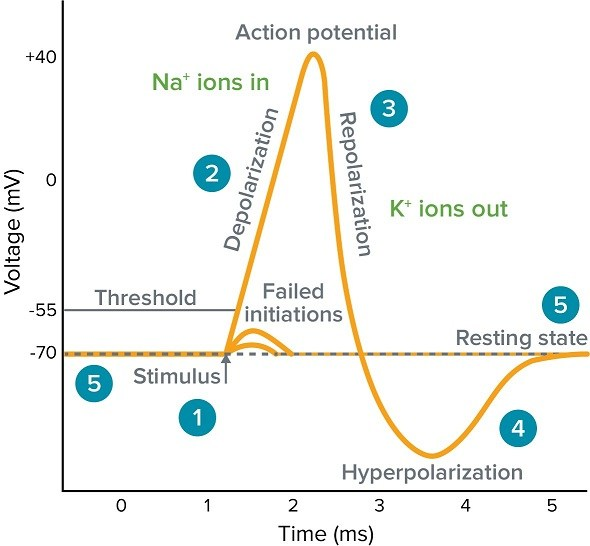

For that there has to exist the firing threshold $\theta$ and potential reset mechanism. The $-S_{out}[t-1]\theta$ part of the equation we implement.

The $S_{out} = 1 \text{ if } U > \theta \text{ else } 0$ 

# Do poprawy 

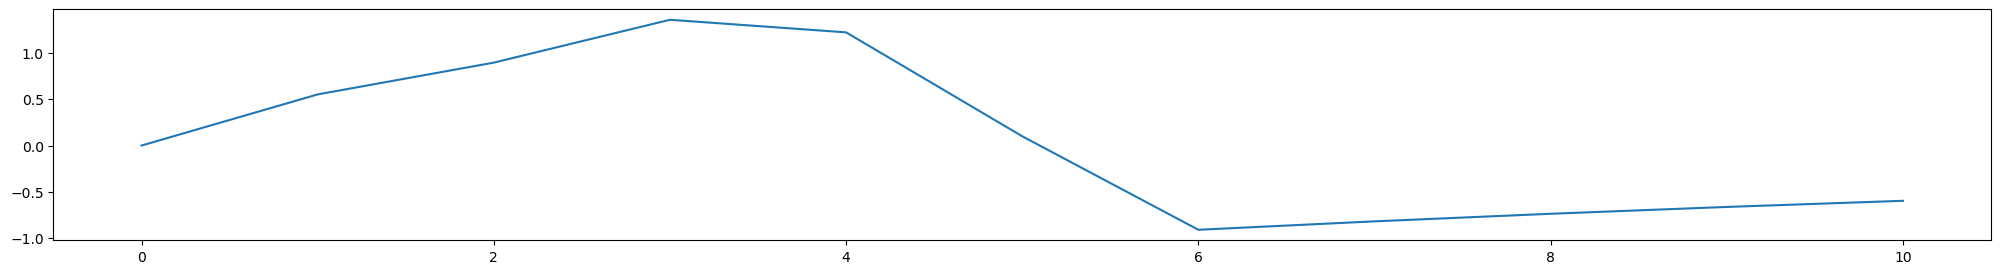

In [45]:
Theta = 1
membrane_potential = [0]
spikes = [0]
for t in range(10):
    I = (W.T @ X[:, t, None])[0][0]
    U = Beta * membrane_potential[-1] + I - spikes[-1] * Theta
    if membrane_potential[-1] > Theta:
        S_out = 1
    else:
        S_out = 0
    spikes.append(S_out) 
    membrane_potential.append(U)

plot(membrane_potential)

Still doesn't really look like membrane potential and it happens because current gets way too high values so we should reinitialize it with some scaling to either inputs, weights or with lower Beta so the decay would be higher and add some more timesteps for better understanding. 

Lets go with Beta as it is the most kosher.

In [55]:
Theta = 1
timesteps = 500
X = np.random.choice([0, 1], p=[0.9, 0.1], size=(3, timesteps))
W = np.random.random(size=(3, 1))
Beta = 0.9
print("Weights: \n", W)
print("100 Inputs, first channel: \n", X[1, :100])
print("Beta: \n", Beta)
print("Theta: \n", Beta)

Weights: 
 [[0.15 ]
 [0.437]
 [0.203]]
100 Inputs, first channel: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Beta: 
 0.9
Theta: 
 0.9


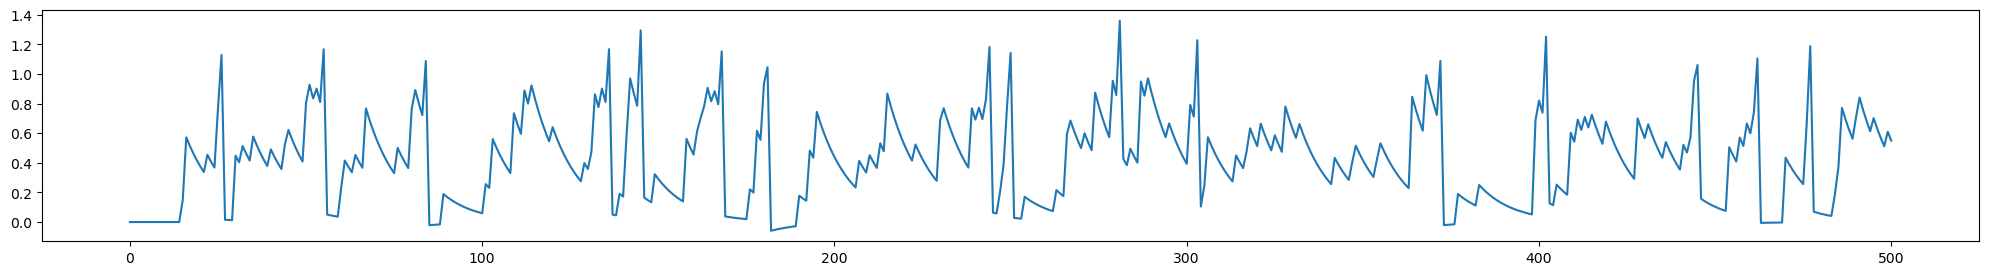

In [56]:
membrane_potential = [0]
spikes = [0]
for t in range(timesteps):
    I = (W * X[:, t, None]).sum()
    U = Beta * membrane_potential[-1] + I - spikes[-1] * Theta
    S_out = 1 if U > Theta else 0
    spikes.append(S_out) 
    membrane_potential.append(U)

plot(membrane_potential)

#### What if

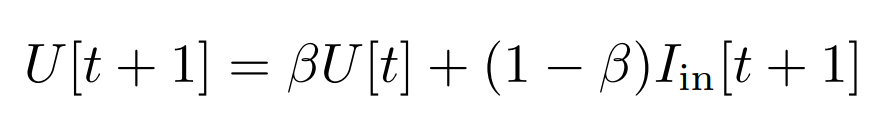

Above equation shows more biologically acurate solution to LIF. Here normally the assumption is made that $(1-\beta) := W$ and it is decoupled from $Beta$ as we saw earlier. What happens if we instead go for $\beta = W - 1$? 

Two approaches:

1. Summing $W$ as $W = \sum{W_i}$
2. Keeping distinct potentials and acting on them with respective $W_i$ as $U = \sum{U_i \cdot W_i}$

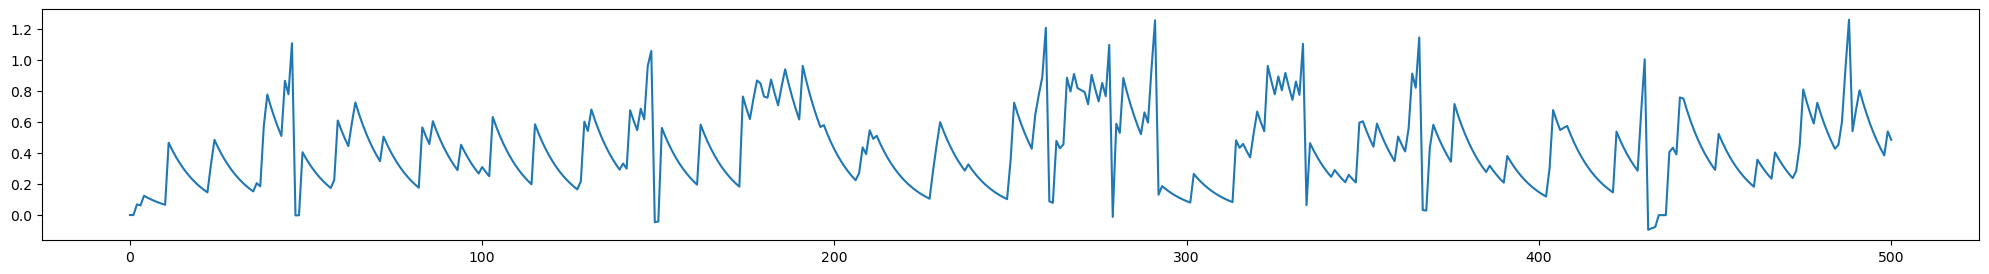

In [59]:
Theta = 1
timesteps = 500
X = np.random.choice([0, 1], p=[0.9, 0.1], size=(3, timesteps))
W = np.random.random(size=(3, 1))

membrane_potential = [0]
spikes = [0]
for t in range(timesteps):
    I = (W * X[:, t, None]).sum()
    # Beta = W.sum()
    U = Beta * membrane_potential[-1] + I - spikes[-1] * Theta
    S_out = 1 if U > Theta else 0
    spikes.append(S_out) 
    membrane_potential.append(U)

plot(membrane_potential)

# ok to nie bedzie dobre, pierwsze primo to suma wag musiałyby być <1, inaczej będzie wybuchać
# drugie primo: nawet jeśli chciałbym ograniczyć sumę wag do 1, to byłby to strzał w stopę bo automatycznie zmniejszałbym liczbę uczalnych wag do n-1